# Diabetic Retinopathy Detection

In [16]:
#Python 3import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import tensorflow as tf
print('TF: {}'.format(tf.__version__))

from matplotlib import pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Input 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from keras.preprocessing import image
from keras.utils import plot_model
from keras.models import Model
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from numpy import array

TF: 2.10.0


In [17]:
LabelsCsv = pd.read_csv('/Volumes/Extreme SSD/DR/trainLabels.csv')

In [18]:
LabelsCsv.values

array([['10_left', 0],
       ['10_right', 0],
       ['13_left', 0],
       ...,
       ['44348_right', 0],
       ['44349_left', 0],
       ['44349_right', 1]], dtype=object)

In [19]:
print(len(LabelsCsv))

35126


In [20]:
LabelsCsv.head(5)

image  level
0   10_left      0
1  10_right      0
2   13_left      0
3  13_right      0
4   15_left      1

0 — Normal

1 — Mild NPDR

2 — Moderate NPDR

3 — Severe NPDR

4 — PDR

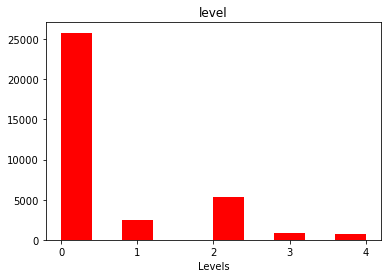

In [21]:
LabelsCsv.hist(color = "red")
plt.grid(False)
plt.xticks([0,1,2,3,4])
plt.xlabel('Levels')
plt.show() 

### Sample Images

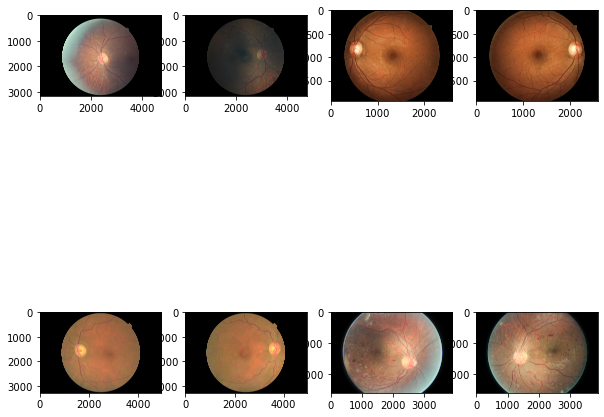

In [22]:
fig, ax = plt.subplots(2,4, figsize=(10, 10))
ax[0,0].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/10_left.jpeg"))
ax[0,1].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/10_right.jpeg"))
ax[0,2].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/13_left.jpeg"))
ax[0,3].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/13_right.jpeg"))

ax[1,0].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/15_left.jpeg"))
ax[1,1].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/15_right.jpeg"))
ax[1,2].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/16_left.jpeg"))
ax[1,3].imshow(Image.open("/Volumes/Extreme SSD/DR/sample/16_right.jpeg"))


In [23]:
# import the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from glob import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from skimage.transform import resize
from sklearn.metrics import accuracy_score

In [24]:
import random
import tensorflow as tf
seed = 42
rng = np.random.RandomState(seed)
import cv2
import os

In [25]:
print(tf.test.gpu_device_name())
from tensorflow.keras import layers, models

2022-11-02 21:40:43.952371: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [26]:
#class distribution in the dataset
LabelsCsv['level'].value_counts()

0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

In [27]:
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

hello = tf.constant('Hello, TensorFlow!')

sess = tf.compat.v1.Session()

print(sess.run(hello))

b'Hello, TensorFlow!'


2022-11-02 21:40:44.027369: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:354] MLIR V1 optimization pass is not enabled


In [16]:
data['image'] = data['image'] + '.jpeg'
print(data['image'])

NameError: name 'data' is not defined

## Image resizing

In [28]:
img_size = cv2.imread('/Volumes/Extreme SSD/DR/sample/13_left.jpeg', cv2.IMREAD_UNCHANGED)

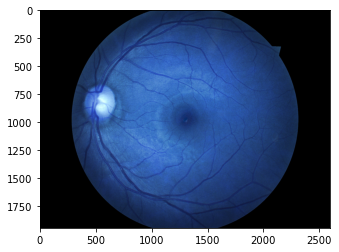

In [29]:
#Show the image with matplotlib
plt.imshow(img_size)
plt.show()

In [30]:
print('Original Dimensions : ',img_size.shape)

Original Dimensions :  (1944, 2592, 3)


In [32]:
scale_percent = 60 # percent of original size
width = int(img_size.shape[1] * scale_percent / 100)
height = int(img_size.shape[0] * scale_percent / 100)
dim = (width, height)

In [33]:
# resize image
resized = cv2.resize(img_size, dim, interpolation = cv2.INTER_AREA)

In [34]:
print('Resized Dimensions : ',resized.shape)

Resized Dimensions :  (1166, 1555, 3)


In [ ]:
#Show the image with matplotlib
plt.imshow(resized)
plt.show()

In [11]:
from __future__ import print_function
import pandas as pd
import shutil
import os
import sys

labels = pd.read_csv(r'/Volumes/Extreme SSD/DR/trainLabels.csv')
train_dir =r'/Volumes/Extreme SSD/DR/DR Images/train 2'
DR = r"/Volumes/Extreme SSD/DR/DR Images/train 2"
if not os.path.exists(DR):
    os.mkdir(DR)

for filename, class_name in labels.values:
    # Create subdirectory with `class_name`
    if not os.path.exists(DR + str(class_name)):
        os.mkdir(DR + str(class_name))
    src_path = train_dir + '/'+ filename + '.jpeg'
    dst_path = DR + str(class_name) + '/' + filename + '.jpeg'
    try:
        shutil.copy(src_path, dst_path)
        print("sucessful")
    except IOError as e:
        print('Unable to copy file {} to {}'
              .format(src_path, dst_path))
    except:
        print('When try copy file {} to {}, unexpected error: {}'
              .format(src_path, dst_path, sys.exc_info()))

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/15_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/15_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/16_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/tr

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/239_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/239_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/240_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/240_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/240_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/240_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/241_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/241_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/241_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/241_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/242_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/242_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/242_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/242_right.jpeg
Unable to copy file /Volumes/Extreme SSD

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/710_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/710_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/715_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/715_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/715_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/715_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/717_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/717_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/717_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/717_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/721_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/721_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/721_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/721_right.jpeg
Unable to copy file /Volumes/Extreme SSD

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1165_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1165_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1167_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/1167_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1167_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/1167_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1170_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1170_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1170_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1170_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1172_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1172_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1172_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1172_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1663_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/1663_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1663_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/1663_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1666_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/1666_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1666_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/1666_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1667_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1667_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1667_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1667_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/1669_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/1669_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2149_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2149_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2149_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2149_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2155_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/2155_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2155_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2155_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2157_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2157_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2157_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2157_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2159_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2159_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2578_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2578_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2582_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2582_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2582_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2582_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2588_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2588_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2588_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2588_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2589_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2589_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/2589_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/2589_right.jpeg
Unable to copy file /Volum

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4127_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4127_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4129_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4129_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4129_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4129_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4130_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/4130_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4130_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/4130_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4132_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4132_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4132_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4132_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4419_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4419_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4421_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/4421_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4421_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/4421_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4424_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4424_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4424_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/4424_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4434_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/4434_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4434_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4434_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4738_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4738_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4738_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4738_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4739_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4739_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4739_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4739_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4740_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4740_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4740_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4740_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/4741_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/4741_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5106_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5106_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5106_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5106_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5108_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5108_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5108_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5108_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5110_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5110_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5110_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5110_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5112_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5112_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5385_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5385_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5385_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5385_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5386_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5386_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5386_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5386_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5387_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5387_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5387_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5387_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5391_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5391_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5750_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5750_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5752_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5752_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5752_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5752_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5757_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5757_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5757_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/5757_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5758_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/5758_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/5758_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/5758_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6030_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6030_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6030_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6030_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6032_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6032_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6032_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/6032_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6035_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6035_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6035_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6035_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6041_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6041_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6391_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/6391_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6397_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/6397_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6397_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/6397_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6402_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6402_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6402_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6402_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6403_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/6403_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6403_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/6403_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6617_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6617_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6617_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/6617_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6618_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6618_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6618_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6618_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6622_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6622_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6622_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6622_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6623_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6623_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6915_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6915_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6917_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6917_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6917_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6917_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6918_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6918_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6918_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6918_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6920_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6920_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/6920_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/6920_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7217_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7217_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7219_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/7219_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7219_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/7219_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7222_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7222_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7222_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/7222_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7225_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7225_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7225_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7225_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7589_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7589_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7590_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7590_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7590_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7590_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7591_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7591_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7591_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7591_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7596_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7596_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7596_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7596_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7905_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/7905_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7906_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/7906_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7906_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/7906_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7910_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7910_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7910_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7910_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7911_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7911_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/7911_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/7911_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8236_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/8236_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8236_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/8236_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8238_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8238_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8238_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8238_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8239_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8239_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8239_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8239_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8242_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8242_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8494_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8494_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8495_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8495_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8495_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8495_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8496_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8496_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8496_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8496_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8498_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8498_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8498_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8498_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8818_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8818_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8818_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8818_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8822_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8822_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8822_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/8822_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8825_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/8825_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8825_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/8825_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/8827_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/8827_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9224_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9224_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9226_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9226_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9226_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9226_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9232_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/9232_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9232_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9232_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9233_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9233_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9233_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9233_right.jpeg
Unable to copy file /Volum

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9614_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9614_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9614_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9614_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9616_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9616_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9616_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9616_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9619_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/9619_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9619_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/9619_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9622_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9622_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9957_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9957_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9957_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9957_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9958_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9958_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9958_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/9958_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9959_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/9959_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9959_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/9959_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/9961_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/9961_left.jpeg
Unable to copy file /Volumes

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10328_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10328_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10333_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10333_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10333_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10333_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10334_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/10334_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10334_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/10334_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10337_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10337_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10337_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10337_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10745_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10745_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10745_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10745_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10748_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10748_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10748_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10748_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10751_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10751_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10751_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10751_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/10752_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/10752_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11115_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11115_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11115_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11115_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11117_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11117_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11117_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11117_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11119_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11119_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11119_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11119_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11120_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/11120_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11485_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11485_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11485_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11485_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11487_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11487_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11487_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11487_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11490_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11490_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11490_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11490_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11492_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/11492_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11909_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11909_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11910_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/11910_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11910_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/11910_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11913_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11913_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11913_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11913_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11914_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11914_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/11914_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/11914_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12289_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12289_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12289_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12289_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12290_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/12290_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12290_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/12290_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12292_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12292_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12292_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12292_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12294_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12294_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12673_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12673_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12673_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12673_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12675_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12675_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12675_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/12675_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12676_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/12676_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12676_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/12676_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/12678_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/12678_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13042_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13042_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13042_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13042_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13043_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/13043_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13043_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/13043_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13051_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/13051_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13051_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13051_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13052_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13052_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13448_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13448_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13448_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13448_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13453_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13453_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13453_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13453_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13454_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13454_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13454_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13454_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13457_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13457_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13817_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13817_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13819_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/13819_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13819_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/13819_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13820_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/13820_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13820_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/13820_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13821_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/13821_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/13821_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/13821_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14198_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14198_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14199_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14199_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14199_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14199_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14200_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14200_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14200_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14200_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14201_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14201_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14201_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14201_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14535_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14535_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14537_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14537_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14537_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14537_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14545_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14545_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14545_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14545_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14548_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/14548_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14548_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/14548_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14856_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14856_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14856_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14856_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14858_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14858_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14858_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14858_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14863_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14863_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14863_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14863_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/14867_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/14867_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15182_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15182_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15185_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/15185_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15185_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/15185_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15190_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15190_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15190_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/15190_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15192_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15192_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15192_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15192_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15520_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15520_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15522_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15522_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15522_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15522_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15523_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/15523_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15523_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/15523_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15527_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15527_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15527_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15527_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15870_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/15870_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15873_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15873_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15873_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15873_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15874_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15874_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15874_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15874_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15879_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15879_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/15879_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/15879_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16280_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/16280_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16283_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16283_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16283_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16283_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16284_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16284_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16284_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16284_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16286_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16286_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16286_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16286_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16624_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/16624_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16624_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/16624_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16626_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16626_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16626_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16626_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16627_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/16627_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16627_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/16627_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16628_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/16628_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16969_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/16969_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16971_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/16971_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16971_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/16971_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16973_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16973_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16973_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16973_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16977_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16977_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/16977_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/16977_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17322_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17322_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17326_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/17326_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17326_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17326_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17330_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17330_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17330_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17330_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17331_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/17331_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17331_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17331_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17693_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17693_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17694_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/17694_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17694_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/17694_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17696_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17696_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17696_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17696_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17698_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17698_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/17698_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/17698_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18048_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18048_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18048_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18048_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18054_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18054_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18054_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18054_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18056_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18056_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18056_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18056_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18057_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18057_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18437_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18437_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18437_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18437_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18438_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18438_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18438_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/18438_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18440_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18440_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18440_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18440_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18443_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18443_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18783_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18783_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18783_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18783_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18786_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18786_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18786_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18786_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18790_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18790_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18790_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/18790_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/18798_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/18798_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19141_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19141_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19141_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/19141_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19143_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19143_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19143_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19143_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19145_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19145_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19145_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19145_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19149_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19149_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19490_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/19490_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19491_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19491_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19491_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19491_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19493_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/19493_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19493_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/19493_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19494_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19494_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19494_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19494_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19890_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19890_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19890_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19890_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19892_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19892_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19892_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/19892_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19896_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/19896_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19896_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/19896_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/19897_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/19897_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20212_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20212_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20212_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20212_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20216_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20216_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20216_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20216_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20219_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20219_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20219_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20219_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20223_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20223_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20567_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20567_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20568_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/20568_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20568_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20568_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20569_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20569_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20569_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20569_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20570_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/20570_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20570_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/20570_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20973_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20973_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20975_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20975_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20975_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20975_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20977_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/20977_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20977_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/20977_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20979_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20979_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/20979_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/20979_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21294_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/21294_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21296_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21296_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21296_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21296_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21297_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/21297_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21297_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/21297_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21298_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21298_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21298_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21298_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21661_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21661_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21670_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21670_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21670_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21670_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21673_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21673_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21673_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21673_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21675_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21675_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/21675_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/21675_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22045_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/22045_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22048_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22048_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22048_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22048_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22050_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22050_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22050_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22050_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22051_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22051_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22051_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22051_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22467_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22467_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22467_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22467_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22468_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22468_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22468_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/22468_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22469_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22469_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22469_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22469_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22470_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22470_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22821_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/22821_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22822_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22822_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22822_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22822_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22825_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22825_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22825_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/22825_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22828_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22828_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/22828_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/22828_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23139_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23139_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23141_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23141_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23141_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23141_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23145_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23145_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23145_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23145_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23146_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/23146_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23146_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23146_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23522_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23522_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23522_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23522_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23523_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23523_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23523_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/23523_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23525_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23525_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23525_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23525_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23528_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23528_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23907_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23907_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23907_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23907_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23909_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23909_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23909_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23909_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23910_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23910_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23910_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/23910_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/23916_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/23916_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24262_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24262_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24262_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24262_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24263_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24263_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24263_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24263_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24266_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24266_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24266_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24266_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24268_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24268_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24681_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/24681_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24681_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/24681_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24689_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24689_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24689_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24689_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24692_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/24692_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24692_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/24692_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/24695_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/24695_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25019_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/25019_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25019_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/25019_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25020_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25020_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25020_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25020_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25022_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25022_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25022_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25022_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25029_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25029_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25390_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/25390_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25392_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25392_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25392_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/25392_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25395_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25395_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25395_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25395_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25396_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25396_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25396_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25396_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25778_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/25778_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25778_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/25778_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25780_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25780_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25780_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25780_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25781_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25781_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25781_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/25781_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/25783_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/25783_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26140_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/26140_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26140_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/26140_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26142_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26142_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26142_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26142_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26144_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26144_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26144_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26144_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26146_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26146_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26515_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26515_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26518_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26518_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26518_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26518_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26519_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26519_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26519_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26519_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26520_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26520_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26520_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26520_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26912_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26912_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26913_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26913_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26913_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26913_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26914_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26914_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26914_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/26914_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26919_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/26919_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/26919_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/26919_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27279_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27279_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27280_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27280_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27280_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27280_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27286_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27286_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27286_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27286_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27287_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27287_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27287_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27287_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27658_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27658_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27658_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27658_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27659_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27659_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27659_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27659_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27662_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27662_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27662_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27662_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/27664_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/27664_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28047_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/28047_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28047_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28047_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28052_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/28052_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28052_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/28052_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28053_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/28053_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28053_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/28053_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28058_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/28058_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28458_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28458_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28458_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28458_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28460_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/28460_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28460_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/28460_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28461_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28461_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28461_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28461_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28463_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/28463_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28897_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28897_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28897_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28897_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28898_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28898_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28898_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28898_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28899_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28899_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28899_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/28899_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/28901_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/28901_left.jpeg
Unable to copy

sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful
sucessful


Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38917_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/38917_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38919_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/38919_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38919_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/38919_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38925_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/38925_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38925_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/38925_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38928_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/38928_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/38928_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/38928_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39088_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39088_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39088_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39088_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39092_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39092_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39092_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39092_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39094_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/39094_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39094_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/39094_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39097_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39097_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39249_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39249_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39250_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39250_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39250_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39250_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39264_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39264_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39264_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39264_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39272_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/39272_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39272_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 23/39272_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39388_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39388_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39389_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39389_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39389_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39389_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39391_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/39391_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39391_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39391_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39395_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39395_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39395_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39395_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39547_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39547_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39549_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39549_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39549_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39549_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39554_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/39554_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39554_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39554_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39556_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39556_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39556_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39556_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39699_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39699_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39700_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39700_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39700_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39700_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39701_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39701_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39701_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39701_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39702_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39702_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39702_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39702_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39860_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/39860_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39860_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/39860_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39863_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39863_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39863_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39863_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39864_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/39864_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39864_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/39864_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/39867_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/39867_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40026_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40026_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40029_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40029_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40029_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40029_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40030_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40030_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40030_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40030_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40033_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/40033_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40033_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40033_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40200_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40200_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40201_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/40201_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40201_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40201_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40202_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40202_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40202_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/40202_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40206_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40206_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40206_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40206_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40334_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40334_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40336_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40336_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40336_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/40336_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40337_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40337_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40337_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40337_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40339_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40339_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40339_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40339_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40470_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40470_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40470_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40470_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40473_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40473_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40473_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40473_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40475_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40475_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40475_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40475_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40476_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40476_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40631_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40631_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40631_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40631_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40634_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40634_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40634_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40634_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40638_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40638_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40638_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40638_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40639_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40639_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40817_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/40817_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40819_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/40819_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40819_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/40819_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40821_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40821_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40821_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40821_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40823_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40823_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40823_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/40823_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40930_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40930_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40930_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40930_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40934_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40934_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40934_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/40934_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40937_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/40937_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40937_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/40937_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/40940_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/40940_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41084_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41084_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41085_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41085_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41085_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41085_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41090_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41090_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41090_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41090_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41094_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41094_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41094_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41094_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41258_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/41258_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41258_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41258_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41263_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41263_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41263_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41263_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41269_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/41269_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41269_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/41269_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41271_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41271_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41453_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/41453_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41457_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41457_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41457_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41457_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41458_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41458_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41458_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41458_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41471_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/41471_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41471_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/41471_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41688_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/41688_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41688_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/41688_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41689_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41689_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41689_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41689_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41692_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41692_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41692_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/41692_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41693_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41693_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41778_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41778_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41784_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41784_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41784_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41784_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41785_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41785_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41785_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41785_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41787_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41787_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41787_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41787_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41895_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41895_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41895_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41895_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41898_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41898_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41898_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41898_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41899_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41899_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41899_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41899_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/41901_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/41901_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42085_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42085_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42085_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42085_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42086_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42086_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42086_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42086_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42087_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42087_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42087_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/42087_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42093_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42093_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42219_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42219_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42223_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42223_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42223_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42223_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42224_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42224_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42224_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42224_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42229_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42229_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42229_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42229_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42433_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42433_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42436_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42436_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42436_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42436_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42440_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42440_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42440_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42440_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42442_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42442_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42442_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/42442_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42598_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42598_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42598_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42598_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42599_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42599_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42599_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42599_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42601_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42601_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42601_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42601_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42607_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42607_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42839_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42839_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42843_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42843_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42843_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42843_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42846_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/42846_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42846_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/42846_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42857_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42857_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/42857_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/42857_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43003_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43003_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43003_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43003_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43005_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43005_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43005_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43005_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43006_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43006_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43006_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43006_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43007_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43007_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43182_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43182_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43182_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43182_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43183_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43183_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43183_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43183_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43186_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43186_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43186_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43186_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43187_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43187_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43355_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43355_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43355_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43355_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43356_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43356_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43356_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43356_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43357_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43357_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43357_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43357_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43358_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43358_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43470_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43470_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43475_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43475_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43475_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43475_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43476_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43476_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43476_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43476_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43477_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43477_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43477_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43477_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43689_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43689_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43689_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43689_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43690_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43690_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43690_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43690_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43691_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43691_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43691_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43691_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43694_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/43694_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43901_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43901_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43901_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43901_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43902_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 21/43902_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43902_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43902_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43903_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43903_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43903_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 22/43903_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43904_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43904_left.jpeg
Unable to copy

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43993_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43993_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43995_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43995_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43995_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43995_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43996_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43996_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43996_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/43996_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43997_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/43997_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/43997_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 24/43997_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44123_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44123_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44127_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44127_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44127_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44127_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44133_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44133_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44133_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44133_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44134_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44134_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44134_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44134_right.jpeg
Unable to co

Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44228_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44228_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44228_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44228_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44229_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44229_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44229_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44229_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44231_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44231_left.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44231_right.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44231_right.jpeg
Unable to copy file /Volumes/Extreme SSD/DR/DR Images/train 2/44232_left.jpeg to /Volumes/Extreme SSD/DR/DR Images/train 20/44232_left.jpeg
Unable to copy